In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import cv2


In [2]:
random_state = 14 
img = cv2.imread('spb_st_isaacs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.mean()

123.05771846912856

In [4]:
n_img = img / 255
n_img.mean()

0.48257928811422945

In [6]:
flat_img = n_img.reshape((n_img.shape[0] * n_img.shape[1], n_img.shape[2]))
km = MiniBatchKMeans(n_clusters=16, random_state=random_state)
km.fit(flat_img)
new_flat_img = []

for i in km.labels_:
    new_flat_img.append(km.cluster_centers_[i])

new_flat_img = np.array(new_flat_img)
new_flat_img.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4818352725880304

[Text(0.5, 0, 'Red'), Text(0, 0.5, 'Blue'), (0.0, 1.0), (0.0, 1.0)]

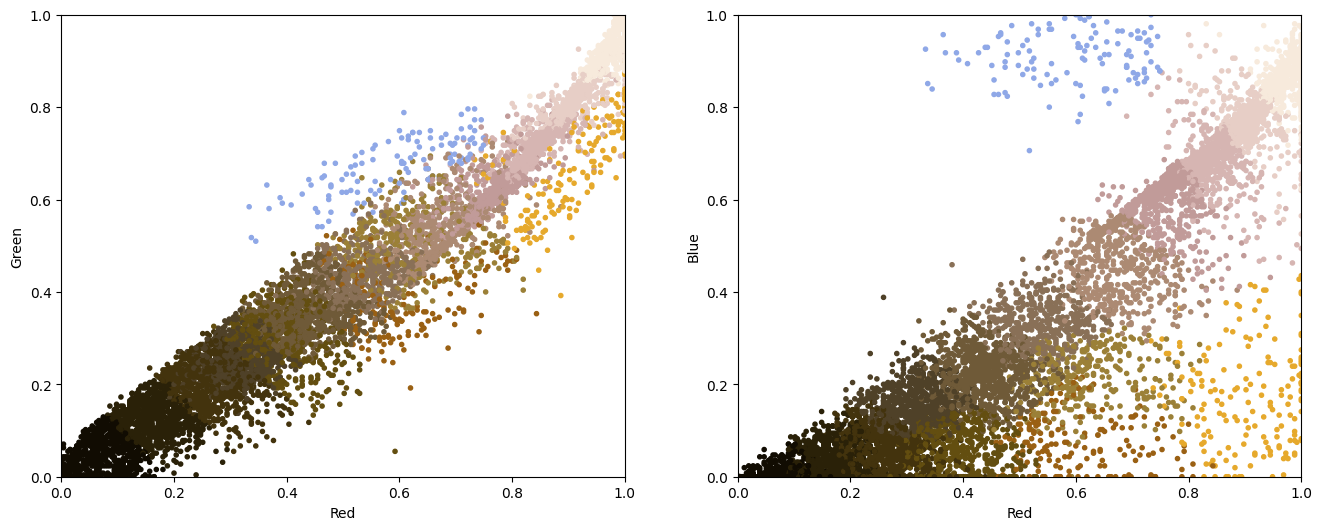

In [7]:
if new_flat_img is None:
        new_flat_img = flat_img
rng = np.random.RandomState(0)
i = rng.permutation(flat_img.shape[0])[:10000]
new_flat_img = new_flat_img[i]
R, G, B = flat_img[i].T

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(R, G, color=new_flat_img, marker='.')
ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

ax[1].scatter(R, B, color=new_flat_img, marker='.')
ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))


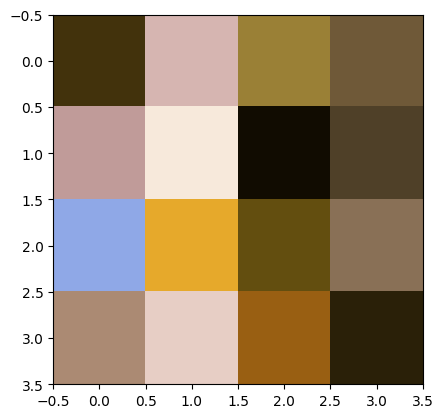

In [8]:
sorted_colors = km.cluster_centers_.copy()
plt.imshow(sorted_colors.reshape((4, 4, 3)))